## MLR Model#2

- [BACK TO TEST DATASET - Clean file](SamayShah_Project2(TEST)_DataCleaning_Test_Dataset.ipynb)
- [BACK TO TRAIN DATASET - Clean file](SamayShah_Project2(Main_TRAIN)_DataCleaning_Train_Dataset.ipynb)
- [TRAIN USING MODEL#4 (MAIN)](SamayShah_MODEL%234__FINAL_MODEL__.ipynb)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from scipy import stats

%matplotlib inline

In [2]:
originaldf = pd.read_csv('datasets/v3_clean_nooutliers.csv')

In [3]:
df2 = pd.read_csv('datasets/model2_withdummies.csv')

## Linear Regression Model - 2

In [4]:
## For this model - 'Lot Area', 'Total Bsmt SF', 'Bedroom AbvGr' + most of dummy variables
targets2 = df2['log_SalePrice']
## Inputs everything except the target & SalePrice
inputs2 = df2.drop(columns=['log_SalePrice'],axis=1)

### Scale the data

In [5]:
scaler2 = StandardScaler()

In [6]:
# Fit the inputs (calculate the mean and standard deviation feature-wise)

scaler2.fit(inputs2)

StandardScaler()

In [7]:
inputs2_scaled = scaler2.transform(inputs2)

### Train Test Split

In [8]:
x_train, x_test, y_train, y_test = train_test_split(inputs2_scaled, targets2, test_size=0.2, random_state=365)

### Create Regression

In [9]:
reg2 = LinearRegression()

In [10]:
reg2.fit(x_train,y_train)

LinearRegression()

In [11]:
y_hat = reg2.predict(x_train)

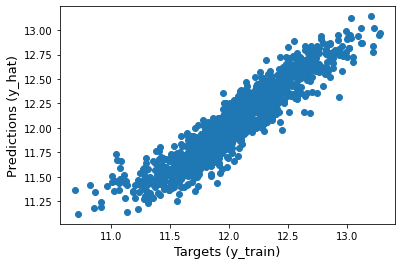

In [12]:
## Compare the targets and predictions for 'Train' set - scatterplot

plt.scatter(y_train,y_hat)
plt.xlabel('Targets (y_train)',size=13)
plt.ylabel('Predictions (y_hat)',size=13);

/Users/samay20/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


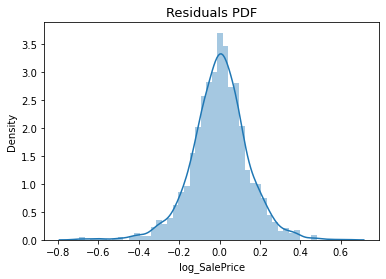

In [13]:
## Residual distribution - to check for anomalies

sns.distplot(y_train-y_hat)
plt.title('Residuals PDF',size=13);

In [14]:
## More negative values in the above plot - indicates y_train < y_hat i.e. targets < predictions (higher predictions)

### Evaluating this model - train set

In [15]:
reg2.score(x_train,y_train)

0.8717849273413839

In [16]:
## To calculate R2_adj later
def r2_adj(y_true, y_preds, p):
    n = len(y_true)
    y_mean = np.mean(y_true)
    numerator = np.sum(np.square(y_true - y_preds)) / (n - p - 1)
    denominator = np.sum(np.square(y_true - y_mean)) / (n - 1)
    return 1 - numerator / denominator

In [17]:
def lord_of_the_metrics(y_true, y_pred, p):
    mse = metrics.mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = metrics.median_absolute_error(y_true, y_pred)
    msle = metrics.mean_squared_log_error(y_true, y_pred)
    r2 = metrics.r2_score(y_true, y_pred)
    r2a = r2_adj(y_true, y_pred, p)
    
    print('Mean squared error      = ', mse)
    print('Root mean squared error = ', rmse)
    print('Mean squared log error = ', msle)
    print('Median absolute error   = ', mae)
    print('R^2                     = ', r2)
    print('Adjusted R^2            = ', r2a)

In [18]:
lord_of_the_metrics(y_train, y_hat, inputs2.shape[1])

Mean squared error      =  0.019873620445812198
Root mean squared error =  0.14097382893931837
Mean squared log error =  0.00011890442226796719
Median absolute error   =  0.08112082880505689
R^2                     =  0.8717849273413839
Adjusted R^2            =  0.8654680728961525


### Finding Coefs & Intercepts

In [19]:
reg2.intercept_

12.022585786113698

In [20]:
reg2.coef_

array([ 9.13179485e-04,  5.86518475e-02,  3.28322540e-02, -1.82632972e-03,
       -7.51198278e-03,  3.25609828e-04,  5.41484104e-03,  6.45297243e-02,
       -1.90102280e-04, -2.04412118e-02,  1.43018368e-02,  3.33835925e-02,
       -3.26919450e-02,  7.02292011e-02,  2.14015518e-02, -2.04687706e-02,
        2.32969712e-02,  5.02429482e-02, -7.00424529e-03,  3.89214323e-02,
        6.63824710e-03,  3.69282020e-03,  1.98108137e-02,  1.06953659e-03,
        3.86989356e-04, -1.80112476e+11, -1.45430784e-02,  7.17939678e+10,
       -1.35179947e-02, -4.59672918e+10,  6.84398239e+10, -6.69045547e+09,
       -6.02794184e+09, -1.27455887e+11, -1.04093719e+11,  6.79449852e+10,
       -7.36240540e+10, -2.51752372e-02,  7.13260058e+10, -5.74784925e+10,
       -3.02325136e+11,  7.75781280e+10,  5.25886929e-03, -6.23379049e+09,
       -4.30788284e+10, -2.08992300e-02, -6.05416005e+09,  7.71514446e+10,
       -6.57431806e+09,  1.15245998e-02, -1.87027027e-02, -2.74566013e+11,
       -1.18427749e-02,  

In [21]:
## reg2 summary
reg2_summary = pd.DataFrame(inputs2.columns.values, columns=['Features'])
reg2_summary['Coefficients'] = reg2.coef_
reg2_summary.head(3)

,Features,Coefficients
0,Id,0.000913
1,Lot Area,0.058652
2,Bedroom AbvGr,0.032832


### Test-1

In [22]:
y_hat_test = reg2.predict(x_test)

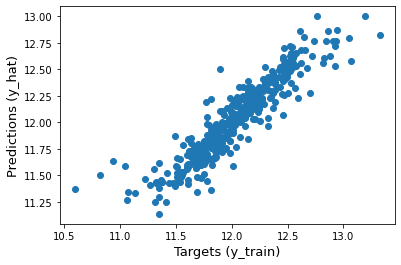

In [23]:
## Compare the targets and predictions for 'Train' set - scatterplot

plt.scatter(y_test,y_hat_test)
plt.xlabel('Targets (y_train)',size=13)
plt.ylabel('Predictions (y_hat)',size=13);

In [25]:
lord_of_the_metrics(y_test, y_hat_test, inputs2.shape[1])

Mean squared error      =  0.024590280595642354
Root mean squared error =  0.15681288402310045
Mean squared log error =  0.0001480458835697445
Median absolute error   =  0.07790352951828616
R^2                     =  0.8404760372845032
Adjusted R^2            =  0.8035861209065445


In [26]:
## Better results than Model#1 but still needs improvement - underfitted Model

- [BACK TO TOP](#MLR-Model#2)